In [2]:
import torch
import torch_geometric

print(torch.__version__)
print(torch_geometric.__version__)

1.13.1+cu116
2.1.0


In [3]:
from matplotlib import transforms
from torch import long
from torch_geometric.data import Data
from torch_geometric.transforms import NormalizeFeatures

edge_index=torch.tensor([
    [0,1,1,2],
    [1,0,2,1]],
    dtype=torch.long)

x=torch.torch.tensor([
    [1.0,2.0,3.0],
    [3.0,4.0,5.0],
    [5.0,6.0,8.0]],
    dtype=torch.float)

data=Data(x=x,edge_index=edge_index)

transform=NormalizeFeatures()
data=transform(data)

print(data.x)

tensor([[0.0000, 0.3333, 0.6667],
        [0.2222, 0.3333, 0.4444],
        [0.2500, 0.3125, 0.4375]])


In [4]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset=Planetoid(root="data/Planetoid",name="Cora",transform=NormalizeFeatures())

print(f"Dateset{dataset}")
print(f"number of graph{len(dataset)}")
print(f"number of features{dataset.num_features}")
print(f"number of classes{dataset.num_classes}")

data=dataset[0]
print()
print(data)
print("**"*30)

DatesetCora()
number of graph1
number of features1433
number of classes7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
************************************************************


In [5]:
print(f"number of nodes: {data.num_nodes}")
print(f"number of :{data.num_edges}")
print(f"average node degree :{data.num_edges/data.num_nodes}")
print(f"number of training nodes{data.train_mask.sum()}")
print(f"Training node label rate{int(data.train_mask.sum())/data.num_nodes}")
print(f'Has isolated nodes:{data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


number of nodes: 2708
number of :10556
average node degree :3.8980797636632203
number of training nodes140
Training node label rate0.051698670605613
Has isolated nodes:False
Has self-loops: False
Is undirected: True


In [6]:
import numpy as np

torch.set_printoptions(threshold=np.inf)

print(data.x.shape)
data.x[1]

torch.Size([2708, 1433])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0435, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0435, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
data.y


tensor([3, 4, 4, 0, 3, 2, 0, 3, 3, 2, 0, 0, 4, 3, 3, 3, 2, 3, 1, 3, 5, 3, 4, 6,
        3, 3, 6, 3, 2, 4, 3, 6, 0, 4, 2, 0, 1, 5, 4, 4, 3, 6, 6, 4, 3, 3, 2, 5,
        3, 4, 5, 3, 0, 2, 1, 4, 6, 3, 2, 2, 0, 0, 0, 4, 2, 0, 4, 5, 2, 6, 5, 2,
        2, 2, 0, 4, 5, 6, 4, 0, 0, 0, 4, 2, 4, 1, 4, 6, 0, 4, 2, 4, 6, 6, 0, 0,
        6, 5, 0, 6, 0, 2, 1, 1, 1, 2, 6, 5, 6, 1, 2, 2, 1, 5, 5, 5, 6, 5, 6, 5,
        5, 1, 6, 6, 1, 5, 1, 6, 5, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 4, 3, 0, 3,
        6, 6, 0, 3, 4, 0, 3, 4, 4, 1, 2, 2, 2, 3, 3, 3, 3, 0, 4, 5, 0, 3, 4, 3,
        3, 3, 2, 3, 3, 2, 2, 6, 1, 4, 3, 3, 3, 6, 3, 3, 3, 3, 0, 4, 2, 2, 6, 5,
        3, 5, 4, 0, 4, 3, 4, 4, 3, 3, 2, 4, 0, 3, 2, 3, 3, 4, 4, 0, 3, 6, 0, 3,
        3, 4, 3, 3, 5, 2, 3, 2, 4, 1, 3, 2, 2, 3, 3, 3, 3, 5, 1, 3, 1, 3, 5, 0,
        3, 5, 0, 4, 2, 4, 2, 4, 4, 5, 4, 3, 5, 3, 3, 4, 3, 0, 4, 5, 0, 3, 6, 2,
        5, 5, 5, 3, 2, 3, 0, 4, 5, 3, 0, 4, 0, 3, 3, 0, 0, 3, 5, 4, 4, 3, 4, 3,
        3, 2, 2, 3, 0, 3, 1, 3, 2, 3, 3,

类别0:351个样本
类别1:217个样本
类别2:418个样本
类别3:818个样本
类别4:426个样本
类别5:298个样本
类别6:180个样本


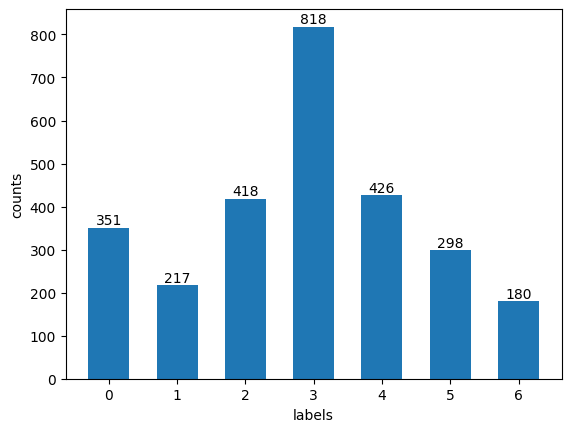

In [8]:
import matplotlib.pyplot as plt

unique_labels,counts=torch.unique(data.y,return_counts=True)

for label,count in zip(unique_labels,counts):
    print(f"类别{label.item()}:{count.item()}个样本")


plt.bar(unique_labels.numpy(),counts.numpy(),width=0.6)
plt.xlabel("labels")
plt.ylabel("counts")

for label,count in zip(unique_labels,counts):
    plt.text(label.item(),count.item()+1,str(count.item()),ha="center",va="bottom")

plt.show()

In [9]:
torch.set_printoptions(profile="default")

print(data.edge_index.shape)
data.edge_index

torch.Size([2, 10556])


tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

In [10]:
data.edge_index.t()

tensor([[   0,  633],
        [   0, 1862],
        [   0, 2582],
        ...,
        [2707,  598],
        [2707, 1473],
        [2707, 2706]])

In [11]:
data.train_mask

tensor([ True,  True,  True,  ..., False, False, False])

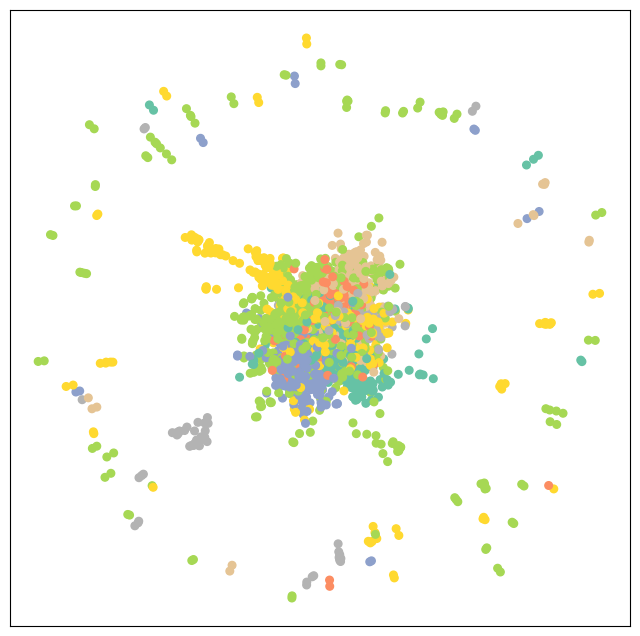

In [12]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

G = to_networkx(data, to_undirected=True)

pos = nx.spring_layout(G, seed=16)

plt.figure(figsize=(8, 8))

nx.draw_networkx_nodes(G, pos=pos, node_color=data.y, cmap="Set2", node_size=30)

plt.show()

In [13]:
import torch.nn as nn
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN_Core(nn.Module):
    def __init__(self,output_channels=7):
        super(GCN_Core,self).__init__()

        self.conv1=GCNConv(1433,64)
        self.conv2=GCNConv(64,7)

        self.dp=nn.Dropout(p=0.5)

    def forward(self,x,edge_index):
        x=self.conv1(x,edge_index)
        x=F.relu(x)

        x=self.dp(x)
        x=self.conv2(x,edge_index)

        return x

model=GCN_Core()
print(model)

GCN_Core(
  (conv1): GCNConv(1433, 64)
  (conv2): GCNConv(64, 7)
  (dp): Dropout(p=0.5, inplace=False)
)


In [14]:
total_params=sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"total parameters :{total_params}")

total parameters :92231


In [15]:
import torch.optim as optim

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model=model.to(device)
data = data.to(device)

optimizer=optim.Adam(model.parameters(),lr=0.01,weight_decay=1e-4)
criterion=nn.CrossEntropyLoss(reduction="mean")

for epoch in range(101):
    model.train()
    optimizer.zero_grad()
    train_outputs=model(data.x,data.edge_index)
    loss=criterion(train_outputs[data.train_mask],data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    train_preds=train_outputs.argmax(dim=1)
    train_correct=train_preds[data.train_mask]==data.y[data.train_mask]
    train_accuracy=int(train_correct.sum())/int(data.train_mask.sum())


    model.eval()
    test_outputs=model(data.x,data.edge_index)

    test_preds=test_outputs.argmax(dim=1)
    test_correct=test_preds[data.test_mask]==data.y[data.test_mask]
    test_accuracy=int(test_correct.sum())/int(data.test_mask.sum())
    if epoch % 10 == 0:
        print('Epoch #{:03d}, Loss: {:.4f}, Train_Accuracy: {:.4f}, Test_Accuracy: {:.4f}'.format(epoch, loss, train_accuracy, test_accuracy))
    

Epoch #000, Loss: 1.9457, Train_Accuracy: 0.1357, Test_Accuracy: 0.2920
Epoch #010, Loss: 1.6745, Train_Accuracy: 0.8857, Test_Accuracy: 0.6890
Epoch #020, Loss: 1.1736, Train_Accuracy: 0.9571, Test_Accuracy: 0.7980
Epoch #030, Loss: 0.6780, Train_Accuracy: 0.9786, Test_Accuracy: 0.8030
Epoch #040, Loss: 0.3369, Train_Accuracy: 0.9857, Test_Accuracy: 0.8150
Epoch #050, Loss: 0.2165, Train_Accuracy: 0.9714, Test_Accuracy: 0.8300
Epoch #060, Loss: 0.1484, Train_Accuracy: 1.0000, Test_Accuracy: 0.8180
Epoch #070, Loss: 0.1247, Train_Accuracy: 1.0000, Test_Accuracy: 0.8100
Epoch #080, Loss: 0.1165, Train_Accuracy: 0.9929, Test_Accuracy: 0.8140
Epoch #090, Loss: 0.1045, Train_Accuracy: 1.0000, Test_Accuracy: 0.8210
Epoch #100, Loss: 0.1009, Train_Accuracy: 1.0000, Test_Accuracy: 0.8240


In [16]:
from sklearn.manifold import TSNE

def plt2arr(fig):
    rgb_str = fig.canvas.tostring_rgb()  
    (w, h) = fig.canvas.get_width_height() 
    rgba_arr = np.frombuffer(rgb_str, dtype=np.uint8).reshape((h, w, 3))  

def visualize(emb, color, epoch):
    fig = plt.figure(figsize=(6,6), frameon=False)
    fig.suptitle(f'Epoch = {epoch}')

    z = TSNE(n_components=2).fit_transform(emb.detach().cpu().numpy())

    plt.xticks([])
    plt.yticks([])
    plt.scatter(z[:, 0],
                z[:, 1],
                s=30,
                c=color.detach().cpu().numpy(),
                cmap="Set2")
    fig.canvas.draw() 
    
    return plt2arr(fig)
        
          

e:\software\anaconda\envs\GNN_pytorch\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\software\anaconda\envs\GNN_pytorch\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\software\anaconda\envs\GNN_pytorch\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\software\anaconda\envs\GNN_pytorch\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\software\anaconda\envs\GNN_pytorch\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


TSNE Visualization Finished.


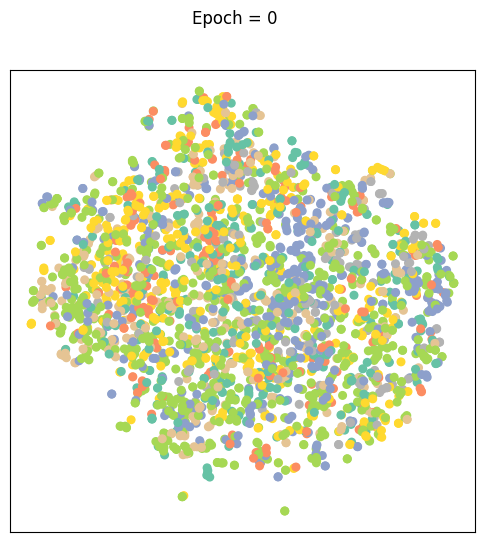

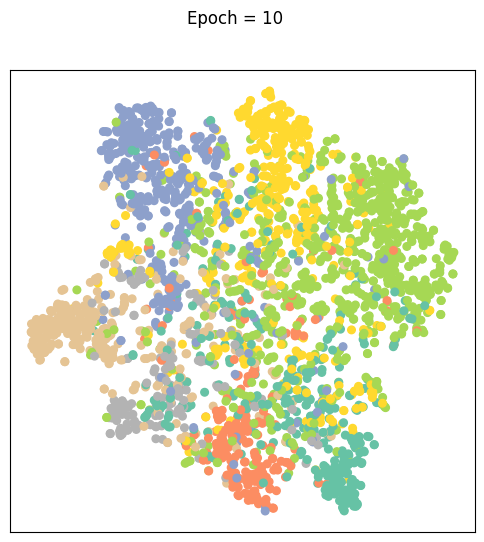

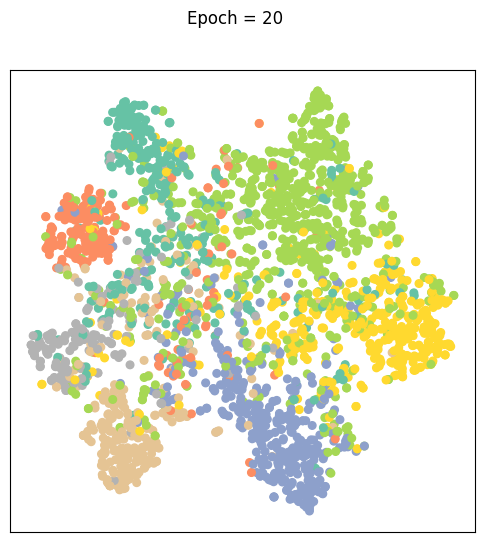

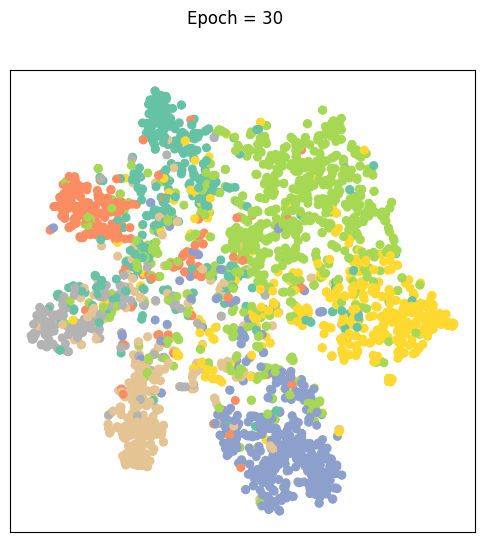

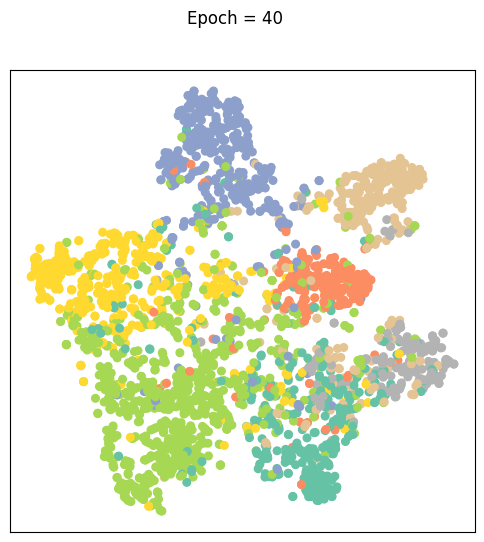

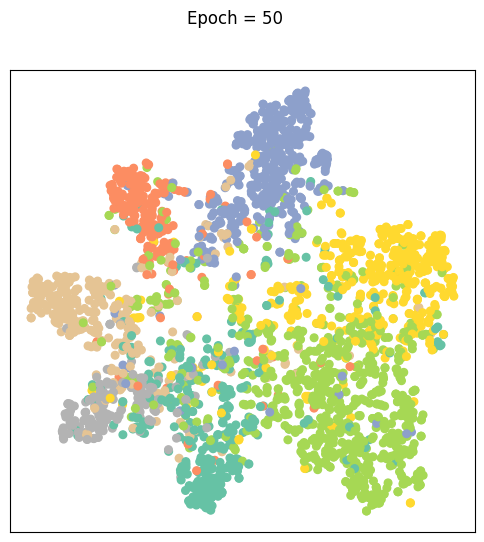

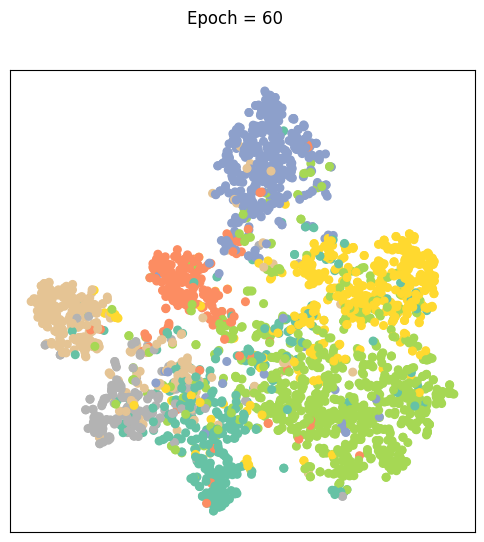

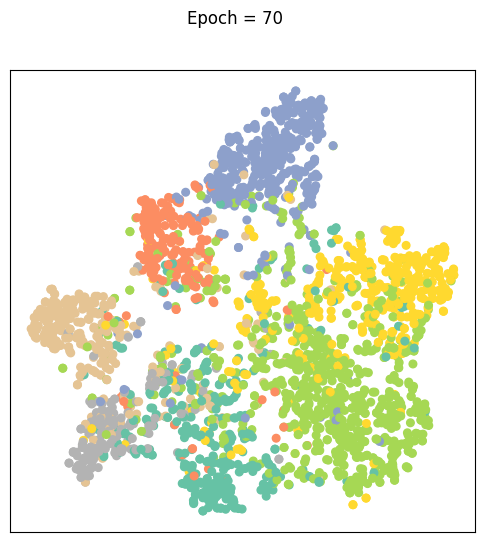

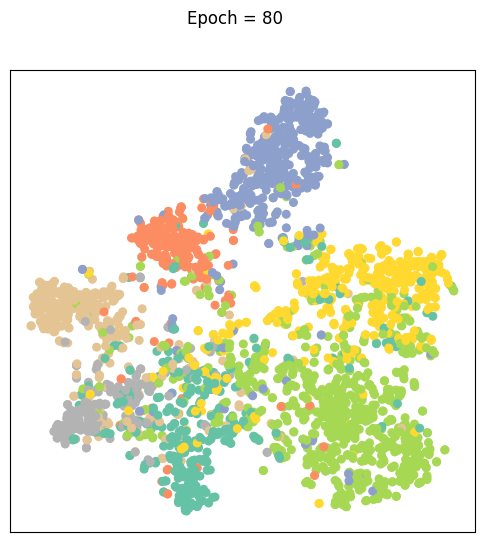

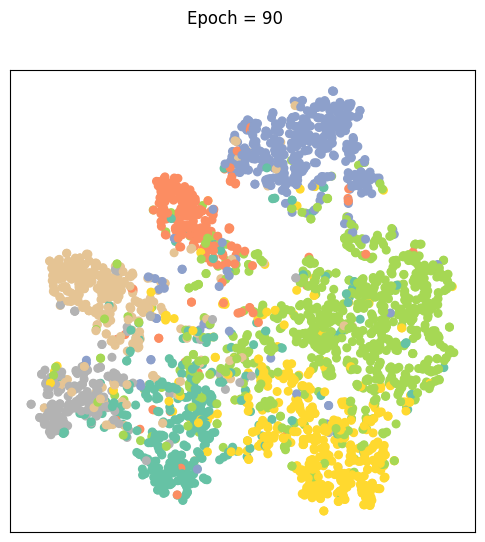

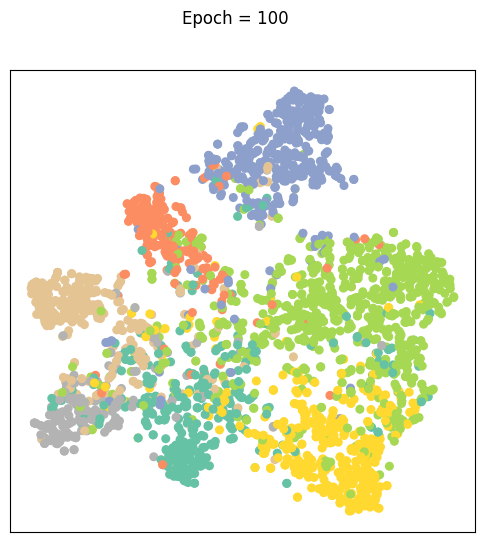

In [17]:
for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()

images = []

for epoch in range(101):
    model.train() 
    optimizer.zero_grad()
    train_outputs = model(data.x, data.edge_index) 
    loss = criterion(train_outputs[data.train_mask], data.y[data.train_mask]) 
    loss.backward() 
    optimizer.step() 
    
    if epoch % 10 == 0:
        images.append(visualize(train_outputs, color=data.y, epoch=epoch))
print("TSNE Visualization Finished.")